# Классификация
## Крупин Михаил 16БИ-2

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 60)

pd.set_option('display.max_colwidth', -1)

data = pd.read_csv("students_data.csv")
data.head()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13


# Первая часть. Препроцессинг данных

## Задание 1

Для начала определим наличие пропусков в наших данных и наличие выбросов. Также определим типы наших признаков и по необходимости преобразуем их другому виду. Для того, чтобы узнать более подробную информацию о наших данных, используем команды `.info` и  `.describe()`

In [271]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
ID            1044 non-null int64
Subject       1044 non-null object
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-nu

В результате данной команды можно убедиться в том, что в данных отсутствуют какие-либо пропуски. Также эта команда показывает тип признака.
Теперь выведем некоторую базовую статистику для наших категориальных и числовых признаков

In [272]:
# For numeric features
data.describe()

,ID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,547057.190613,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,263827.330362,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,100097.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,324017.500000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,554339.500000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,774486.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,999194.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [273]:
# For categorical features
data.describe(include=[object])

,Subject,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,Por,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,649,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673


Для числовых признаков все параметры достаточно понятные, а вот что касается категориальных, то нужно разъяснить слегка. <br>
`count` - кол-во объектов <br>
`unique` - кол-во уникалных значений для признака <br>
`top` - наиболее встречающееся значение для признака <br>
`freq` - частота повторения наиболее встречающегося значения для признака <br>

Также для простоты работы переведем наши категориальные данные в бинарные

In [274]:
# Отделение числовых и категориальных признаков 
categorical_features = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_features = [c for c in data.columns if data[c].dtype.name != 'object']
data_describe = data.describe(include=[object])


In [275]:
binary_columns = [c for c in categorical_features if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_features if data_describe[c]['unique'] > 2]
binary_columns, nonbinary_columns

# Бинаризация данных с двумя значениями 
# 0 - Por, 1 - Math
for c in binary_columns:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.at[top_items, c] = 0 
    data.at[np.logical_not(top_items), c] = 1

data
    
# Бинаризауция данных с кол-ом значений больше 2    
data_nonbinary = pd.get_dummies(data[nonbinary_columns])

In [276]:
# Сбор данных в один датафрейм

data = data.drop(('Mjob'), axis=1)
data = data.drop(('Fjob'), axis=1)
data = data.drop(('reason'), axis=1)
data = data.drop(('guardian'), axis=1)
data = pd.concat((data, data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype = int)

data.head()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,100097,0,0,0,16,0,0,1,3,4,1,1,0,0,1,0,0,0,0,0,0,3,2,1,1,4,5,12,15,13,14,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1,101021,0,0,0,17,0,0,0,3,2,1,2,0,0,1,0,1,1,0,0,0,5,3,4,1,3,3,2,17,18,17,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,102965,0,0,1,16,0,1,0,1,2,2,1,2,0,1,0,0,1,0,0,0,4,4,5,3,5,5,0,9,8,10,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,102989,0,1,1,17,0,0,0,2,3,2,2,0,0,1,0,1,0,0,0,0,4,4,3,1,1,3,4,14,15,16,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,103131,0,0,0,16,0,0,0,1,1,2,1,0,0,0,0,0,0,0,1,0,4,3,2,1,4,5,2,12,13,13,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


## Задание 2

Теперь нужно рассмотреть распределение оценок (G1, G2, G3) для разных предметов. 

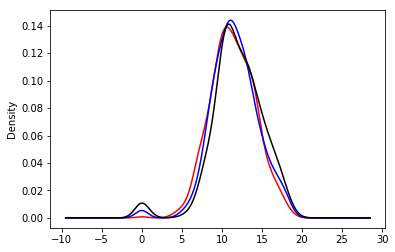

In [277]:
# Plot of marks for Portogese 
data[data['Subject'] == 0]['G1'].plot(kind='kde', c='red')
data[data['Subject'] == 0]['G2'].plot(kind='kde', c='blue')
data[data['Subject'] == 0]['G3'].plot(kind='kde', c='black')

plt.show()

По данному графику можно сделать вывод, что в течение всего года оценки за `Португальский язык` сильно не менялись и оставались в районе `10-12`. Исключение составил только второй семестр и итоговая оценка. Так как во втором семестре начали появляться `0`, то данная оценка смогла повлиять на итоговую оценку. В результате некоторые ученики получили оценку `0` за португальский язык 

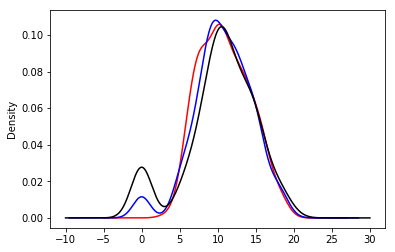

In [278]:
# Plot of marks for Math
data[data['Subject'] == 1]['G1'].plot(kind='kde', c='red')
data[data['Subject'] == 1]['G2'].plot(kind='kde', c='blue')
data[data['Subject'] == 1]['G3'].plot(kind='kde', c='black')

plt.show()

На этом же графике видно, что средняя оценка за весь период обучения по предмету `Математика` сместилась ближе к нулю и стала равна уже `9-11`. Также можно заметить, что во втором семестре больше учеников получали  `0` за данный предмет, что говорит о том, что итог  `0` вышел больше у учеников с предметом `Математика`, чем `Португальский язык`

## Задание 3

Теперь нужно определить зависимость итоговой оценки (`G3`) от след признаков: `Пола`,`Времени в пути от дома до школы`,`Наличия дополнительной помощи в учебе (от членов семьи или вообще)`, `Посещения платных дополнительных занятий`,`Наличия интернета`,`Наличия романтических отношений`, `Потребления алкоголя`. Для этого мы будем использовать таблицу корелляции Пирсона

In [279]:
colnames = ['G3', 'sex', 'traveltime', 'schoolsup', 'famsup', 'paid', 'internet', 'romantic', 'Dalc', 'Walc']
data[colnames].corr()

,G3,sex,traveltime,schoolsup,famsup,paid,internet,romantic,Dalc,Walc
G3,1.000000,-0.031472,-0.102627,-0.079346,-0.013313,-0.049388,-0.107064,-0.098363,-0.129642,-0.115740
sex,-0.031472,1.000000,0.042508,-0.119411,0.137696,-0.002179,-0.062671,-0.108944,0.275928,0.302623
traveltime,-0.102627,0.042508,1.000000,-0.033940,0.026117,-0.083679,0.169485,0.013603,0.109423,0.084292
schoolsup,-0.079346,-0.119411,-0.033940,1.000000,-0.086945,0.021606,0.016827,-0.089979,-0.025852,-0.093517
famsup,-0.013313,0.137696,0.026117,-0.086945,1.000000,-0.169424,0.082522,0.009997,0.022275,0.073596
paid,-0.049388,-0.002179,-0.083679,0.021606,-0.169424,1.000000,-0.114189,-0.020512,0.041919,0.042812
internet,-0.107064,-0.062671,0.169485,0.016827,0.082522,-0.114189,1.000000,-0.049882,-0.039511,-0.043615
romantic,-0.098363,-0.108944,0.013603,-0.089979,0.009997,-0.020512,-0.049882,1.000000,0.045311,-0.016426
Dalc,-0.129642,0.275928,0.109423,-0.025852,0.022275,0.041919,-0.039511,0.045311,1.000000,0.627814
Walc,-0.115740,0.302623,0.084292,-0.093517,0.073596,0.042812,-0.043615,-0.016426,0.627814,1.000000


По данной таблицы можно заметить, что итоговая оценка не с кем сильно не коррелирует (нет сильной зависимости). Если посмотреть внимательно, то самый высокий коэффициент корреляции достигается у `G3` с `Dalc` (~0.12). Также можно заметить, что отсальные признаки также не сильно коррелируют между собой, коэффициент корреляции ни у какого признака не превосходит и 50%. Также для наглядности можно приветсти отрисовку матрицы корреляции

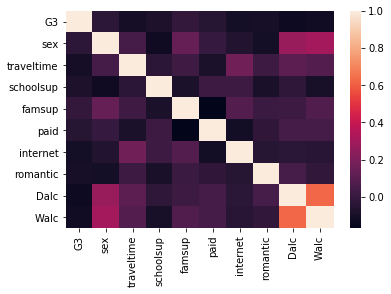

In [333]:
import seaborn as sns

sns.heatmap(data[colnames].corr())
plt.show()

## Задание 4

Теперь необходимо оценить распределение признака `reason` в зависимости от оценки по 4 балльной шкале. То есть можно сейчас не отрисовывать графки плостности для каждого из признака, а просто найти среднее значение вектора оценок для каждой из причины выбора школы, то есть:

In [280]:
print('Reason - near home:', data[data['reason_home'] == 1]['G3'].mean())
print('Reason - good courses:', data[data['reason_course'] == 1]['G3'].mean())
print('Reason - good reputation:', data[data['reason_reputation'] == 1]['G3'].mean())
print('Reason - other reasons:', data[data['reason_other'] == 1]['G3'].mean())

Reason - near home: 11.368217054263566
Reason - good courses: 10.965116279069768
Reason - good reputation: 12.181451612903226
Reason - other reasons: 10.851851851851851


По этим результатам можно сделать вывод, что несмотря на то, какую причину выбора школы преследовали родители ученика (или сам ученик), средняя итоговая оценка по 4х бальной шкале равна `Удовлитворительно` 

# Вторая часть. Машинное обучение

## Задание 1. Регрессия

## С использованием признака 'G1'

Для начала еще чуточку подготовим наши данные, а именно разделим их на обучающую и тестовую выборку

In [281]:
cols = ['G2', 'G3']
X = data.drop(cols, axis=1)
y = data['G3'][:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

А также сделаем импорт необходимых библиотек

In [282]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Линейная регрессия

Начнем с того, что используем простую линейную регрессию и посчитаем для нее среднеквадратичную ошибку

In [283]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

error = r2_score(y_test, y_pred)
print('Коэффициент детерминации:', error)

Коэффициент детерминации: 0.6494051223440286


На тестовой выборке на кросс-валидации мы получили следующие результаты

In [284]:
scores = cross_val_score(linear_model, X_train, y_train, cv=5,
                        scoring='r2')
print('Average value on cross-validation:', scores.mean())

Average value on cross-validation: 0.6505070257158012


### Lasso regression

Теперь же возьмем `Lasso` регрессию. Данный алгоритм в дополнение еще сам произведет `feature selection`. Я буду его комбинировать с функций `GridSearchCV`, которая подбирает оптимальные параметры для алгоритма, в данном случае параметр `alpha`

In [285]:
params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
lasso_model = Lasso()
clf = GridSearchCV(lasso_model, params)
clf.fit(X_train, y_train)
# Получим наши оптимально подобранные параметры
clf.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Теперь проверим модель на кросс-валидации

In [286]:
scores = cross_val_score(clf, X_train, y_train, cv=5,
                        scoring='r2')
print('Average value on cross-validation:', scores.mean())

Average value on cross-validation: 0.6647428972696602


In [287]:
lassp_model = Lasso(alpha=0.1, max_iter=1000, selection='cyclic', tol=0.0001)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

error = r2_score(y_test, y_pred)
print('Коэффициент детерминации: ', error)

Коэффициент детерминации:  0.6680204156741463


### Ridge regression

Теперь используем другую регрессию и подберем для нее параметры

In [288]:
k = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4, 1.5, 1.6, 10]
params = {'alpha': k, 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge_model = Ridge()
clf = GridSearchCV(ridge_model, params)
clf.fit(X_train, y_train)
clf.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='svd', tol=0.001)

In [289]:
ridge_model = Ridge(alpha=10, solver='svd', tol=0.001)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

error = r2_score(y_test, y_pred)
print('Коэффициент детерминации: ', error)

Коэффициент детерминации:  0.6542508568221654


In [290]:
scores = cross_val_score(ridge_model, X_train, y_train, cv=5,
                        scoring='r2')
print('Average value on cross-validation:', scores.mean())

Average value on cross-validation: 0.6551156467265287


### KNeighborsRegression

In [291]:
params = {'n_neighbors': range(1,20), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_model = KNeighborsRegressor()
clf = GridSearchCV(knn_model, params)
clf.fit(X_train, y_train)
clf.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=18, p=2,
          weights='uniform')

In [292]:
knn_model = KNeighborsRegressor(n_neighbors=18)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

error = r2_score(y_test, y_pred)
print('Коэффициент детерминации: ', abs(error))

Коэффициент детерминации:  0.09644207316287834


In [293]:
scores = cross_val_score(knn_model, X_train, y_train, cv=5,
                        scoring='r2')
print('Average value on cross-validation:', abs(scores).mean())

Average value on cross-validation: 0.04585457575201786


## Без использования признака 'G1'

Уберем из наших данных признаки `G1`, `G2`, `G3`

In [294]:
cols = ['G1', 'G2', 'G3']
X = data.drop(cols, axis=1)
y = data['G3'][:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

### Линейная регрессия

In [295]:
linear_without_g1_model = LinearRegression()
linear_without_g1_model.fit(X_train, y_train)

y_pred = linear_without_g1_model.predict(X_test)

error = r2_score(y_test, y_pred)
print('Коэффициент детерминации:', error)

Коэффициент детерминации: 0.14117774992745236


In [296]:
scores = cross_val_score(linear_without_g1_model, X_train, y_train, cv=5,
                        scoring='r2')
print('Average value on cross-validation:', scores.mean())

Average value on cross-validation: 0.21742979482322666


### Lasso regression

In [297]:
params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4]}
lasso_withou_g1_model = Lasso()
clf = GridSearchCV(lasso_withou_g1_model, params)
clf.fit(X_train, y_train)
# Получим наши оптимально подобранные параметры
clf.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [298]:
scores = cross_val_score(clf, X_train, y_train, cv=5,
                        scoring='r2')
print('Average value on cross-validation:', scores.mean())

Average value on cross-validation: 0.2176091765514668


In [299]:
lasso_withou_g1_model = Lasso(alpha=0.1, max_iter=1000, selection='cyclic', tol=0.0001)
lasso_withou_g1_model.fit(X_train, y_train)
y_pred = lasso_withou_g1_model.predict(X_test)

error = r2_score(y_test, y_pred)
print('Коэффициент детерминации: ', error)

Коэффициент детерминации:  0.1410526857472767


### Ridge regression

In [300]:
k = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4, 1.5, 1.6, 10]
params = {'alpha': k, 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge_without_g1_model = Ridge()
clf = GridSearchCV(ridge_without_g1_model, params)
clf.fit(X_train, y_train)
clf.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [301]:
ridge_without_g1_model = Ridge(alpha=10, solver='auto', tol=0.001)
ridge_without_g1_model.fit(X_train, y_train)
y_pred = ridge_without_g1_model.predict(X_test)

error = r2_score(y_test, y_pred)
print('Коэффициент детерминации: ', error)

Коэффициент детерминации:  0.15259043140204998


In [302]:
scores = cross_val_score(ridge_without_g1_model, X_train, y_train, cv=5,
                        scoring='r2')
print('Average value on cross-validation:', scores.mean())

Average value on cross-validation: 0.22677366005249402


### KNeighborsRegression

In [303]:
params = {'n_neighbors': range(1,20), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_without_g1_model = KNeighborsRegressor()
clf = GridSearchCV(knn_without_g1_model, params)
clf.fit(X_train, y_train)
clf.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=18, p=2,
          weights='uniform')

In [304]:
knn_without_g1_model = KNeighborsRegressor(n_neighbors=18)
knn_without_g1_model.fit(X_train, y_train)
y_pred = knn_without_g1_model.predict(X_test)

error = r2_score(y_test, y_pred)
print('Коэффициент детерминации: ', abs(error))

Коэффициент детерминации:  0.09644207316287834


In [305]:
scores = cross_val_score(knn_without_g1_model, X_train, y_train, cv=5,
                        scoring='r2')
abs(scores.mean())

0.041698740509779994

### Итог

Если рассматривать регресиия с признаком `G1`, то максимальный коэффициент детерминации на кросс-валидации достигается у `Lasso regression` (~0.66). Если же рассматривать регрессию без участия признака `G1`, то наилучший рещультат дает алгоритм `Ridge regression` (~0.22)

## Задание 2

Для начала также сделаем импорт необходимых модулей из `sklearn`

In [306]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score, accuracy_score, classification_report

А также преобразуем наши данные к такому виду, чтобы можно было произвести бинарную классификацию. Я преобразовал столбец `G3` к такому виду: <br> $G3 >= 8 - 1$ (ученик сдал предмет) <br> $G3 < 8 - -1$ (ученик не сдал предмет)

In [307]:
cols = ['G1', 'G2', 'G3']
X = data.drop(cols, axis=1)
y = data['G3'][:]
y = pd.Series(list(map(lambda x: 1 if x >= 8 else -1, y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

P.S. Будем использовать `scoring='f1'` как метрику для определения качества для бинарной классификации на кросс-валидации. Берем данную метрику, так как именно она нужна для определения качества бинарной классификации (взята из документации)

### KNeighborsClassifier

Для начала возьмем алгоритм ближайшего соседа и посмотрим его результат без подбора параметров на кросс-валидации, а потом с подбором

In [308]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='f1')
print('Average value on cross-validation without right parametrs:', scores.mean())

Average value on cross-validation without right parametrs: 0.9412413877826802


In [309]:
params = {'n_neighbors': range(1,30), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
model = KNeighborsClassifier()
clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

Попробуем подобрать праметр `leaf_size` для классификатора и посмотрим что выйдет

In [310]:
acc = []
k = [i for i in range(2,50)]
for i in k:
    model = KNeighborsClassifier(n_neighbors=9, leaf_size=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac = f1_score(y_test, y_pred)
    acc.append(ac)

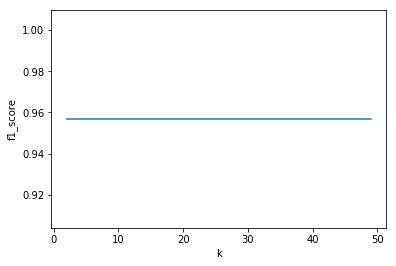

In [311]:
plt.plot(k, acc)
plt.xlabel('k')
plt.ylabel('f1_score')
plt.show()

Итог - внезависимости от значения этого параметра, метрика `f1_score` всегда остается на прежнем уровне (~0.95)

In [312]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='f1')
print('Average value on cross-validation with right parametrs:', scores.mean())

Average value on cross-validation with right parametrs: 0.9443030483408437


### Logistic regression

Сделаем все тоже самое, но уже с алгоритмом логистической регресии

In [313]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

classification_report(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='f1')
print('Average value on cross-validation:',scores.mean())

Average value on cross-validation: 0.9466114095624831


In [314]:
params = {'C': range(1,10), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model = LogisticRegression()
clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)
clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [315]:
model = LogisticRegression(C=1, solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

classification_report(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='f1')
print('Average value on cross-validation:',scores.mean())

Average value on cross-validation: 0.9480096161283298


### Decision Tree Classifier

In [316]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

classification_report(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='f1')
print('Average value on cross-validation:',scores.mean())

Average value on cross-validation: 0.9170093638595656


In [317]:
params = {'min_samples_split': range(2,40), 'max_depth': range(2,20), 'criterion': ['gini', 'entropy']}
model = DecisionTreeClassifier()
clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)
clf.best_estimator_


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [318]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3 , min_samples_split=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

# classification_report(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='f1')
print('Average value on cross-validation:',scores.mean())

Average value on cross-validation: 0.947903200800836


Так как мы смогли подобрать с помощью метода `GridSearchCV` основные параметры, то мы можем их применить для поиска оптимального значения `min_samples_leaf`. Сделаем это с помощью отрисовки графика зависимости значения параметра `min_samples_leaf` и метрики `f1_score`

In [319]:
f1 = []
k = [i for i in range(2,40)]
for i in k:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=3 , min_samples_split=2,
                                  min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f = f1_score(y_test, y_pred)
    f1.append(f)

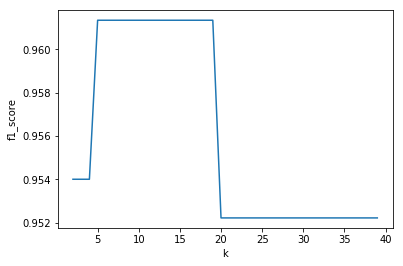

In [320]:
plt.plot(k, f1)
plt.xlabel('k')
plt.ylabel('f1_score')
plt.show()

В итоге получаем, что можно выбрать значения параметра от `5` до `18`. Возьмем значение `8` и получим конечную модель 

In [321]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3 , min_samples_split=2,
                              min_samples_leaf=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

# classification_report(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='f1')
print('Average value on cross-validation:',scores.mean())

Average value on cross-validation: 0.9487274082394702


### Итог

Получилось, что наилучший рещультат дал алгоритм `Decision Tree Classifier`. По метрике `f1` он равен около `0.9487`

## Задание 3

Для начала также подготовим наши данные для многоклассовой классификации. Введем следующие обозначения: <br>
$18 <= G3 <= 20 - 5$ (отлично) <br>
$14 <= G3 <= 17 - 4$ (хорошо) <br>
$8 <= G3 <= 13 - 3$ (удовлитворительно) <br>
$G3 < 8 - 2$ (неудовлитворитльно)

In [322]:
cols = ['G1', 'G2', 'G3']
X = data.drop(cols, axis=1)
y = data['G3'][:]

new_y = []
for el in y:
    if el >= 18 and el <= 20:
        el = 5
        
    elif el >= 14 and el <= 17:
        el = 4
        
    elif el >= 8 and el <= 13:
        el = 3
        
    else:
        el = 2
    new_y.append(el)

y = pd.Series(new_y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

P.S. Буду использовать метрику `f1_samples` на кросс-валидации, так как она предназначена для определения качества классификатора в многокласовой классификации

### KNeighborsClassifier

Делаем все те же шаги, что и для бинарной классификации. В многоклассовой классификации у нас изменится только метрика качества на кросс валидации

In [323]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='accuracy')
print('Average value on cross-validation without right parametrs:', scores.mean())

Average value on cross-validation without right parametrs: 0.5261994682930643


In [324]:
params = {'n_neighbors': range(1,30), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
model = KNeighborsClassifier()
clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform')

In [325]:
acc = []
k = [i for i in range(2,50)]
for i in k:
    model = KNeighborsClassifier(n_neighbors=24, leaf_size=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    acc.append(ac)

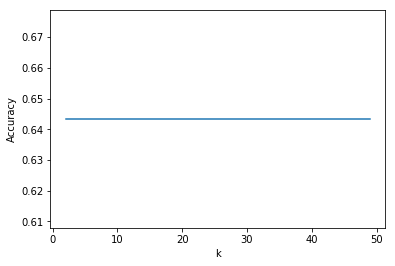

In [326]:
plt.plot(k, acc)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Итог - как и в случае с бинарной классификацией, алгоритм `KNeighborsClassifier` не меняет точность с изменением параметра `accuracy`

### Decision Tree Classifier

In [327]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

classification_report(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='accuracy')
print('Average value on cross-validation:', scores.mean())

Average value on cross-validation: 0.5176960669325201


In [328]:
params = {'min_samples_split': range(2,40), 'max_depth': range(2,20), 'criterion': ['gini', 'entropy']}
model = DecisionTreeClassifier()
clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)
clf.best_estimator_


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=38,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

С помощью `GridSearchCV` были подобраны не все оптимальные значения для нашего алгоритма. Нужно еще подобрать параметр `min_samples_leaf`!

In [329]:
f1 = []
k = [i for i in range(2,40)]
for i in k:
    model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=38,
                                  min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f = accuracy_score(y_test, y_pred)
    f1.append(f)

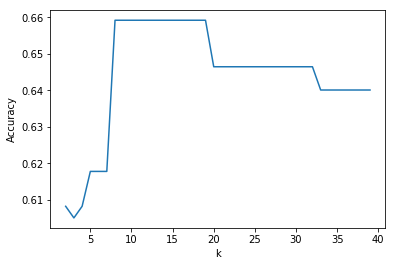

In [330]:
plt.plot(k, f1)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Получается, что мы можем взять значения где-то от `10` и до `18`. Используем значение `12`

In [331]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=38,
                                  min_samples_leaf=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

classification_report(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='accuracy')
print('Average value on cross-validation:', scores.mean())

Average value on cross-validation: 0.6163431464539839


## Итог

Лучший результат также дает алгоритм `Decison Tree Classifier` при правильно подобранных оптимальных значениях